<a href="https://colab.research.google.com/github/mark-morelos/mark-morelos.github.io/blob/master/Spotify_Top_100_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What does it take to be at the Spotify Top 100?**

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# loading dataset from local machine and checking first 5 data
spotify = pd.read_csv('sample_data/116709_279414_bundle_archive.zip')
spotify.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [4]:
spotify.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [5]:
# checking for errors
spotify.isnull().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [6]:
spotify.dtypes

id                   object
name                 object
artists              object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [7]:
# Top 10 Artists with most music in the Top 100
spotify['artists'].value_counts().head(10)

XXXTENTACION       6
Post Malone        6
Drake              4
Ed Sheeran         3
Marshmello         3
Camila Cabello     2
Kendrick Lamar     2
Khalid             2
The Weeknd         2
Imagine Dragons    2
Name: artists, dtype: int64

In [8]:
# Classification according to Tempo: this is measured to beats per minute (bpm)
spotify.loc[spotify['tempo']>200,'Tempo_Class']='prestissimo'
spotify.loc[(spotify['tempo']>=168) & (spotify['tempo']<=200), 'Tempo_Class']='presto'
spotify.loc[(spotify['tempo']>=120) & (spotify['tempo']<=168), 'Tempo_Class']='allegro'
spotify.loc[(spotify['tempo']>=108) & (spotify['tempo']<=120), 'Tempo_Class']='moderato'
spotify.loc[(spotify['tempo']>=76) & (spotify['tempo']<=108), 'Tempo_Class']='andante'
spotify.loc[(spotify['tempo']>=66) & (spotify['tempo']<=76), 'Tempo_Class']='adagio'
spotify.loc[(spotify['tempo']>=60) & (spotify['tempo']<=66), 'Tempo_Class']='larghetto'
spotify.loc[(spotify['tempo']>=40) & (spotify['tempo']<=60), 'Tempo_Class']='largo'
spotify['Tempo_Class'].value_counts()

andante      44
allegro      43
presto        7
moderato      4
adagio        1
larghetto     1
Name: Tempo_Class, dtype: int64

Text(0.5, 1.0, 'Popular Tempo')

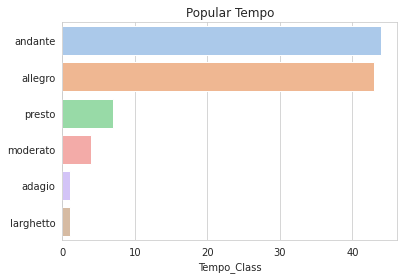

In [9]:
# It is showing that most songs (87%) have a speed between 76 - 168 bpm, not too fast and not too slow
# between andante and allegro
sns.set_style(style='whitegrid')
TClass=spotify['Tempo_Class'].value_counts()
TClass_DF=pd.DataFrame(TClass)
sns.barplot(x=TClass_DF.Tempo_Class, y=TClass_DF.index, palette="pastel")
plt.title('Popular Tempo')

In [22]:
# check for mean value of tempo
# the mean of 119.9 bpm falls under the moderato classification which is between andante and allegro
spotify['tempo'].mean()

119.90417999999998

In [10]:
# finding the correlation between song features
spotify.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.072582,-0.051759,0.015517,-0.058019,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368,0.119421
energy,-0.072582,1.000000,-0.136345,0.732719,-0.117555,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017,0.255235
key,-0.051759,-0.136345,1.000000,-0.105309,-0.141568,0.019583,0.141590,-0.136607,-0.125443,-0.032622,0.003737,0.046144,-0.087096
loudness,0.015517,0.732719,-0.105309,1.000000,-0.110178,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310,0.072301
mode,-0.058019,-0.117555,-0.141568,-0.110178,1.000000,-0.150076,-0.030028,0.089667,0.024428,-0.210599,-0.011911,0.055411,-0.083782
speechiness,0.227075,-0.073591,0.019583,-0.252037,-0.150076,1.000000,-0.081536,-0.069543,-0.099379,-0.051054,0.102999,-0.009856,0.235615
acousticness,-0.134374,-0.421209,0.141590,-0.269742,-0.030028,-0.081536,1.000000,-0.089583,-0.150177,-0.020800,-0.158013,-0.069627,-0.158935
instrumentalness,-0.066592,0.093684,-0.136607,0.036248,0.089667,-0.069543,-0.089583,1.000000,-0.016249,-0.095123,0.178142,-0.045873,0.011894
liveness,-0.038761,0.050542,-0.125443,0.000006,0.024428,-0.099379,-0.150177,-0.016249,1.000000,-0.042612,-0.107652,-0.042942,-0.079558
valence,0.413855,0.382434,-0.032622,0.407760,-0.210599,-0.051054,-0.020800,-0.095123,-0.042612,1.000000,-0.148423,-0.131901,0.223410


In [11]:
# key variables were dependent on keys C to C, while the mode variables were just major or minor
# I left out just the continuous variable for further analysis on correlation
corr_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
corr_table = spotify[corr_columns].corr()
corr_table

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,-0.072582,0.015517,0.227075,-0.134374,-0.066592,-0.038761,0.413855,-0.195012,-0.068368
energy,-0.072582,1.000000,0.732719,-0.073591,-0.421209,0.093684,0.050542,0.382434,0.062272,0.073017
loudness,0.015517,0.732719,1.000000,-0.252037,-0.269742,0.036248,0.000006,0.407760,-0.035156,0.265310
speechiness,0.227075,-0.073591,-0.252037,1.000000,-0.081536,-0.069543,-0.099379,-0.051054,0.102999,-0.009856
acousticness,-0.134374,-0.421209,-0.269742,-0.081536,1.000000,-0.089583,-0.150177,-0.020800,-0.158013,-0.069627
instrumentalness,-0.066592,0.093684,0.036248,-0.069543,-0.089583,1.000000,-0.016249,-0.095123,0.178142,-0.045873
liveness,-0.038761,0.050542,0.000006,-0.099379,-0.150177,-0.016249,1.000000,-0.042612,-0.107652,-0.042942
valence,0.413855,0.382434,0.407760,-0.051054,-0.020800,-0.095123,-0.042612,1.000000,-0.148423,-0.131901
tempo,-0.195012,0.062272,-0.035156,0.102999,-0.158013,0.178142,-0.107652,-0.148423,1.000000,0.005493
duration_ms,-0.068368,0.073017,0.265310,-0.009856,-0.069627,-0.045873,-0.042942,-0.131901,0.005493,1.000000


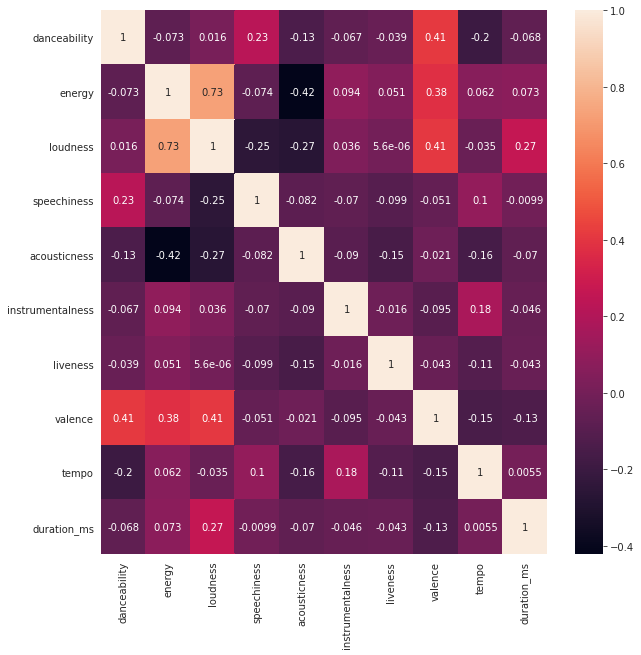

In [20]:
# correlations:
# the louder the music, the more energetic
# the greater positivity, the louder, more energetic and danceable
# more words to relate to, the more danceable
# the faster the music, the less danceable
plt.figure(figsize = (10,10))
sns.heatmap(corr_table, annot=True);

In [26]:
# checking measures for danceability by classifying
party = spotify['danceability']>=0.75
danceable = (spotify['danceability']>=0.5) & (spotify['danceability']<0.75)
not_danceable = spotify['danceability']<0.5
dance_d = [party.sum(), danceable.sum(), not_danceable.sum()]
dance_table = pd.DataFrame(dance_d, columns=['% share'],
                           index=['Party', 'Danceable', 'Listen'])
dance_table

,% share
Party,43
Danceable,53
Listen,4


In [27]:
# check for energy levels by classifying
Hi_En = spotify['energy']>=0.75
Me_En = (spotify['energy']>=0.5) & (spotify['energy']<0.75)
Lo_En = spotify['energy']<0.5
energy_d = [Hi_En.sum(), Me_En.sum(), Lo_En.sum()]
energy_table = pd.DataFrame(energy_d, columns=['% share'],
                            index=['Very Energetic', 'Energetic', 'Low Energy'])
energy_table

,% share
Very Energetic,32
Energetic,55
Low Energy,13


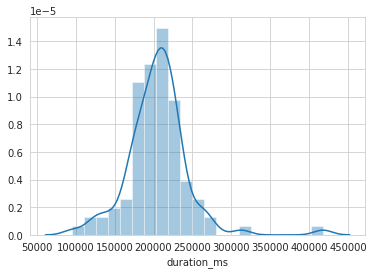

In [21]:
# check for mean of duration
# the graph shows a mean of 205,206.78 ms per song or about 3.42 minutes
sns.distplot(spotify['duration_ms']);